# Capstone Project Random Forest Feature Importances

Liam Fisher

3/1/2022

### For previous portions of this project see:

Capstone_Project_Pt1, Capstone_Project_Pt2, Capstone_Project_Pt3,

## Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Reading Data Into Python
pandas_data = pd.read_csv('/Users/liamf/OneDrive/Documents/DataSci2/Capstone Project/data/data_prepped.csv')

In [13]:
pandas_data

,RID,baseline_diagnosis,study_enrolled,VISCODE2,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,...,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
0,2,CN,ADNI1,bl,2.243,2.477,2.065,3.507,2.188,2.354,...,2.173,2.649,1.704,2.816,2.196,2.150,1.853,2.297,1.834,1.915
1,21,CN,ADNI1,bl,2.537,2.519,2.395,3.323,2.259,2.339,...,2.492,2.520,1.652,2.837,2.335,1.865,2.005,2.157,2.182,2.016
2,23,CN,ADNI1,bl,3.325,2.972,2.418,4.303,2.540,2.163,...,2.202,2.870,2.002,2.653,2.485,1.875,1.935,2.413,1.981,2.042
3,35,CN,ADNI1,bl,2.422,2.520,2.043,3.738,2.467,2.003,...,2.094,2.832,1.947,2.655,2.356,1.775,1.942,2.383,1.870,1.898
4,42,MCI,ADNI1,bl,2.180,2.341,1.656,3.329,2.504,2.183,...,2.035,2.527,1.843,2.426,2.429,1.899,1.786,2.347,1.832,1.846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,4626,MCI,ADNI2,bl,2.601,2.278,1.645,3.523,2.244,2.074,...,1.989,2.375,1.688,2.549,2.446,1.770,1.709,2.168,1.843,1.913
740,4643,CN,ADNI2,bl,2.157,2.559,1.717,3.154,2.159,2.441,...,2.092,2.391,1.879,2.514,2.044,1.699,1.849,2.466,1.778,2.024
741,4654,MCI,ADNI2,bl,2.089,2.466,2.043,3.295,2.109,2.260,...,2.208,2.820,1.948,3.338,2.568,1.888,1.743,2.091,1.992,2.120
742,4676,AD,ADNI2,bl,2.997,2.595,2.327,3.708,2.127,2.221,...,2.196,2.626,2.650,2.939,2.815,2.043,1.904,2.017,2.306,2.005


## Random Forest Feature Importance

RF feature importances will be used to see which Blood Gene Expressions contribute most to the prediction of Diagnosis.

In [14]:
# Fitting RF
clf = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)
clf.fit(pandas_data.iloc[:, 4:], pandas_data["baseline_diagnosis"])

RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=0)

In [18]:
# Calculating Importances
# https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(pandas_data.columns, clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'}).sort_values(by='Importance', ascending=False)
importances.iloc[0:10]

,Importance
11744987_x_at,0.007657
11760523_at,0.005427
11754853_s_at,0.005038
11732932_at,0.004968
11748373_s_at,0.004962
11748375_a_at,0.004879
11764217_at,0.004857
11755241_a_at,0.004751
11718791_s_at,0.004736
11718757_s_at,0.004725


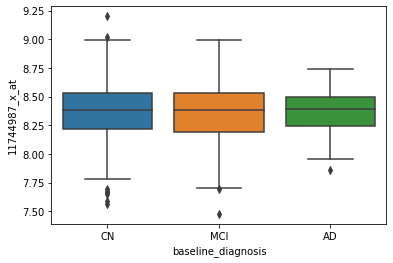

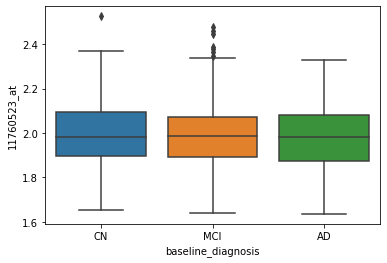

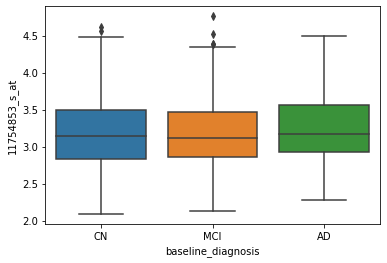

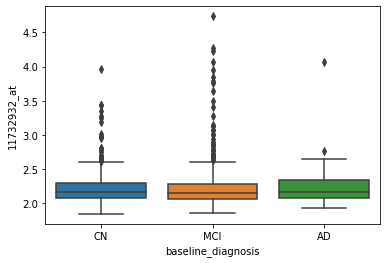

In [26]:
ax = sns.boxplot(y='11744987_x_at', x='baseline_diagnosis', data=pandas_data, orient="v")
plt.show()
ax = sns.boxplot(y='11760523_at', x='baseline_diagnosis', data=pandas_data, orient="v")
plt.show()
ax = sns.boxplot(y='11754853_s_at', x='baseline_diagnosis', data=pandas_data, orient="v")
plt.show()
ax = sns.boxplot(y='11732932_at', x='baseline_diagnosis', data=pandas_data, orient="v")
plt.show()

# References
1. https://www.tensorflow.org/tutorials/keras/classification
2. https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
3. https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html
4. https://pbpython.com/categorical-encoding.html